# Assignment 3 : Study on multiple datasets

## Import Libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## Titanic Dataset

<p style = 'font-size: 15px'>Number of features = 26 , excluding passenger ID and 2urvived, but the actual number of features are 7, as we can remove the zero columns as they are in here for One Hot Encoding.<br>
Number of data rows = 1309 but two rows contain NaN values, so after dropping them we get 1307 rows<br>
Numerical Attributes = Age of the passenger, Fare paid, 'Parch' or # of parents/children, 'sibsp' or # of siblings/spouses<br>
Categorical Attributes = 'Pclass' or class of passenger, sex of the passenger, 'Embarked' the port of Embarkation<br></p>

### Reading Dataset and Pre processing

In [122]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [123]:
titanic.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [124]:
titanic.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [125]:
titanic = titanic.dropna()

In [126]:
X = titanic.copy()
for fn in X.columns:
    if len(X[fn].unique()) == 1:
        X = X.drop(columns = [fn])
Y = titanic['2urvived']
X = X.drop(columns = ['Passengerid','2urvived'])
print(X.shape)
print(Y.shape)
X.head()

(1307, 7)
(1307,)


,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.2500,0,1,0,3,2.0
1,38.0,71.2833,1,1,0,1,0.0
2,26.0,7.9250,1,0,0,3,2.0
3,35.0,53.1000,1,1,0,1,2.0
4,35.0,8.0500,0,0,0,3,2.0


In [127]:
scaler = MinMaxScaler()
X[['Age', 'Fare','Parch','sibsp']] = scaler.fit_transform(X[['Age', 'Fare','Parch','sibsp']])
X.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,0.273456,0.014151,0,0.125,0.0,3,2.0
1,0.473882,0.139136,1,0.125,0.0,1,0.0
2,0.323563,0.015469,1,0.000,0.0,3,2.0
3,0.436302,0.103644,1,0.125,0.0,1,2.0
4,0.436302,0.015713,0,0.000,0.0,3,2.0


In [128]:
pclass = X['Pclass'].values.reshape(-1, 1)
embarked = X['Embarked'].values.reshape(-1, 1)
sex = X['Sex'].values.reshape(-1, 1)

ohe = OneHotEncoder()

pclass_ohe = ohe.fit_transform(pclass)
embarked_ohe = ohe.fit_transform(embarked)
sex_ohe = ohe.fit_transform(sex)


In [129]:
t_n = X[['Age', 'Fare', 'Parch','sibsp']]
#t_n = scaler.fit_transform
X = hstack((t_n, embarked_ohe, sex_ohe, pclass_ohe))
print(X.shape)


(1307, 12)


In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.2, random_state = 5)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1045, 12) (262, 12)
(1045,) (262,)


###
<div style = "font-size:15px">
First, I normalised all the numerical features.<br>
Then,I converted categorical features by using One Hot Encoder <br>
Combined them together to get a matrix of dimension, (1307,12) <br>
Split the data into testing and training part. <br>
</div>

### Logistic Regression

In [131]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.8053435114503816


In [132]:
cs = [0.1, 0.25, 0.5, 0.75, 0.9]
coeffs = []
accs = []

for c in cs:
    lr = LogisticRegression(C = c)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    coeffs.append(lr.coef_)
    lr_acc = accuracy_score(y_test, y_pred)
    accs.append(lr_acc)


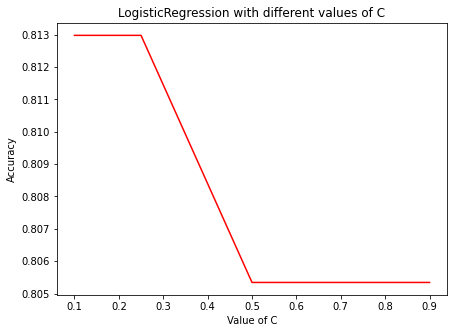

In [133]:
plt.figure(figsize = (7, 5))
plt.title('LogisticRegression with different values of C')
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.plot(cs, accs, color = 'red')
plt.show()

After, performing the above experiment, I can clearly observe that best accuracy is around 81.3% at C = 0.25.

### Decision Tree Classifier

In [134]:
accs = []
for d in range(1,51,1):
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    dt_acc = accuracy_score(y_test, y_pred)
    accs.append(dt_acc)

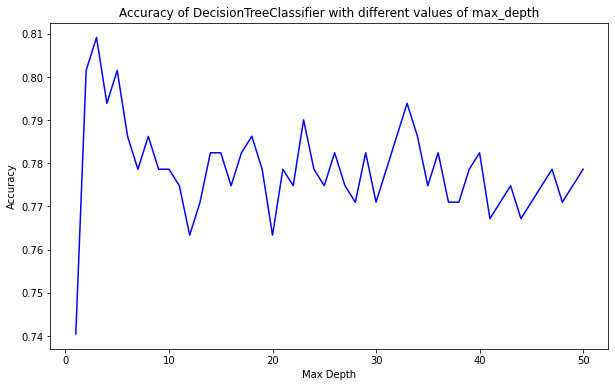

In [135]:
ds = [i for i in range(1,51,1)]
plt.figure(figsize = (10, 6))
plt.title('Accuracy of DecisionTreeClassifier with different values of max_depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.plot(ds, accs, color = 'blue')
plt.show()

I iterated from 1 to 50 and varied the max-depth in similar manner and from the following I can see that the best accuracy is at max depth 3, which is equal to ~81%. There is no trend that can be observed on the basis of max-depth.

### Conclusion

<div style = 'font-size:15px'>The Logistic Regression model performed better in the case of Titanic Data set for classification of survivor as compared to Decision Tree Classifier, although marginally.</div>

## Forest Cover Type Dataset

<h4>Part 1</h4>
<div style = 'font-size: 15px;'>
There are 54 attributes excluding the cover_type , and in total of 581012 data rows.<br>
There are 14 numerical attributes and 40 categorical attributes, which are essentially soil types.
</div>
<h4>Part 2</h4>
<div style = 'font-size: 15px;'>
There are total of 2 attributes excluding the cover type and 530895 data rows. <br>
There are only 2 numerical attributes and no categorical attributes.
</div>

### Reading dataset and data pre processing

In [136]:
forest = pd.read_csv("covtype.csv")
forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [137]:
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [138]:
forest.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [139]:
forest['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [140]:
forest['Soil_Type32'].value_counts()

0    528493
1     52519
Name: Soil_Type32, dtype: int64

In [141]:
X1 = forest.copy()
X1[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']] = scaler.fit_transform(X1[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']])
X1 = X1.drop(columns = ['Cover_Type'])
Y1 = forest['Cover_Type']
print(Y1.shape)
X1.head()

(581012,)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,0


In [142]:
forestx = forest[(forest['Cover_Type'] == 1) | (forest['Cover_Type'] == 2) | (forest['Cover_Type'] == 3)]
print(forestx.shape)
forestx.head()

(530895, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
12,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,2


In [143]:
forestx = forestx[['Slope', 'Elevation', 'Cover_Type']]
print(forestx.shape)

(530895, 3)


In [144]:
X2 = forestx.copy()
X2[['Slope','Elevation']] = scaler.fit_transform(X2[['Slope','Elevation']])
X2 = X2.drop(columns = ['Cover_Type'])
Y2 = forestx['Cover_Type']

print(Y2.shape)
X2.head()

(530895,)


,Slope,Elevation
2,0.136364,0.517241
3,0.272727,0.506842
5,0.090909,0.394089
11,0.166667,0.562124
12,0.333333,0.483306


In [145]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, stratify = Y1, test_size = 0.98, random_state = 42)
print(x_train1.shape, x_test1.shape)
print(y_train1.shape, y_test1.shape)

(11620, 54) (569392, 54)
(11620,) (569392,)


In [146]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, stratify=Y2,test_size = 0.2)
print(x_train2.shape, x_test2.shape)
print(y_train2.shape, y_test2.shape)

(424716, 2) (106179, 2)
(424716,) (106179,)


<h5>Part 1</h5>
<div style = 'font-size: 15px'>
I normalised my numerical features, then kept 2% of the dataset for training and 98% for testing.
</div>
<h5>Part 2</h5>
<div style = 'font-size: 15px'>
    I just normalised my data and then split the data into training and testing sets.
</div>

### SVM

In [119]:
svc = SVC(verbose=True)
svc.fit(x_train1, y_train1)
y_pred1 = svc.predict(x_test1)


In [147]:
print(accuracy_score(y_test1, y_pred1))

0.725127855677635


In [148]:
cm = confusion_matrix(y_test1,y_pred1,labels=svc.classes_)
print(cm)

[[143899  58347    180      0      0      0   5177]
 [ 44981 225180   6796      9      0     36    633]
 [     0   3841  30709    276      0    213      0]
 [     0      0   2064    425      0    203      0]
 [   167   8310    826      0      0      0      0]
 [     0   6046  10391     67      0    516      0]
 [  7733    137     77      0      0      0  12153]]


[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7')]

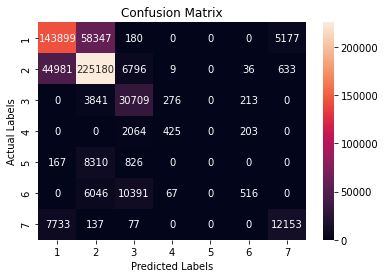

In [149]:
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(svc.classes_)
ax.yaxis.set_ticklabels(svc.classes_)

<div style = 'font-size: 15px'>
Above, I have plotted the confusion matrix from where I can observe number of points for each combination of original and predicted class. We can see that our model is not able to classify a single point of label 5 and the classification from label 4 onwards is pretty poor. The accuracy of the model is 72.5%.
</div>

### Logistic Regression

In [120]:
logreg = LogisticRegression()
logreg.fit(x_train2, y_train2)

LogisticRegression()

/tmp/ipykernel_4194/3129041014.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


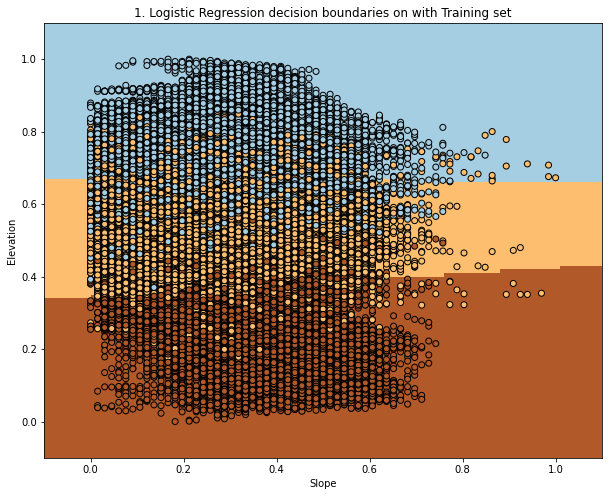

In [150]:
x_min, x_max = min(X2.values[:, 0]) - 0.1, max(X2.values[:, 0]) + 0.1
y_min, y_max = min(X2.values[:, 1]) - 0.1, max(X2.values[:, 1]) + 0.1
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.title('1. Logistic Regression decision boundaries on with Training set')
plt.scatter(x_train2.values[:, 0], x_train2.values[:, 1], c=y_train2, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Slope')
plt.ylabel('Elevation')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

/tmp/ipykernel_4194/4182778859.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


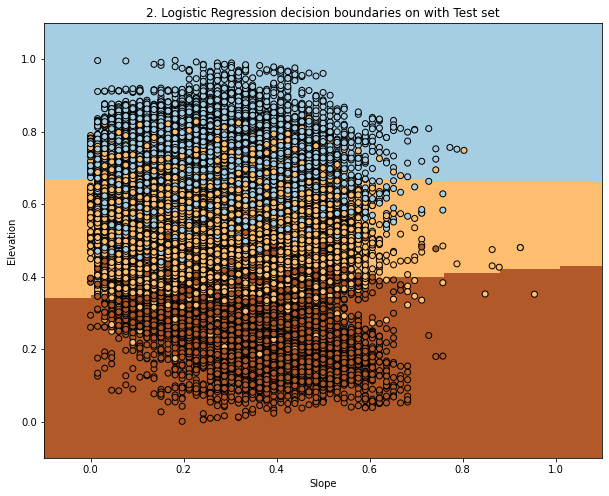

In [151]:


plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.title('2. Logistic Regression decision boundaries on with Test set')
plt.scatter(x_test2.values[:, 0], x_test2.values[:, 1], c=y_test2, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Slope')
plt.ylabel('Elevation')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

/tmp/ipykernel_4194/3546256627.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


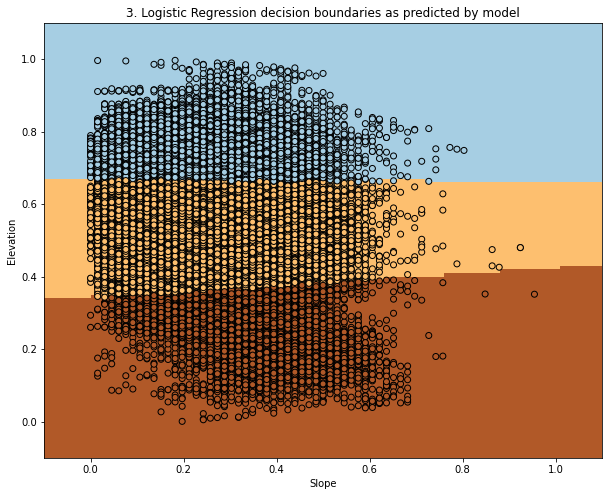

In [152]:
y_pred2 = logreg.predict(x_test2)

plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.title('3. Logistic Regression decision boundaries as predicted by model')
plt.scatter(x_test2.values[:, 0], x_test2.values[:, 1], c=y_pred2, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Slope')
plt.ylabel('Elevation')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [153]:
print(accuracy_score(y_train2,logreg.predict(x_train2)))
print(accuracy_score(y_test2,y_pred2))

0.7333041373529605
0.7345143578297026


<div style = 'font-size: 15px;'>
From the plot 1, we can visualize the boundaries on the training data set.<br>
Plot 2 and Plot 3 gives us a Reality vs Expectation check for our model, where we can see what original distribution was and how are model perceived it. <br>
Also, we get a 73.3% accuracy on training dataset and 73.4% accuracy on testing data set.
</div>